In [49]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import graphviz
import platform

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


# 글씨체 '맑은 고딕'으로
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # MacOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

# 음수 가능
plt.rcParams['axes.unicode_minus'] = False 

Text(0, 0.5, 'relu(x), tanh(x)')

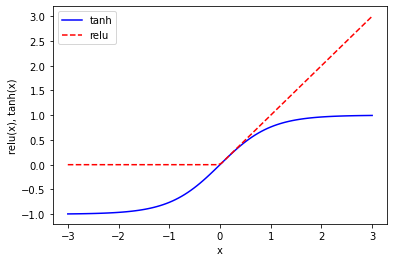

In [31]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh', color='b')
plt.plot(line, np.maximum(line,0), linestyle='--', label='relu', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

### 신경망 튜닝

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Text(0, 0.5, '특성 1')

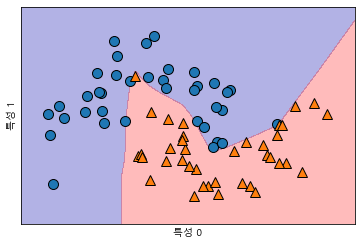

In [50]:
X, y = make_moons(n_samples=100, noise = 0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

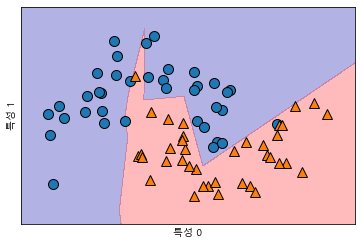

In [59]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=100)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

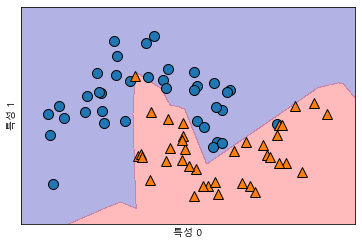

In [61]:
# 10개의 유닛으로 된 '두 개의 은닉층'
mlp = MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[10,10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

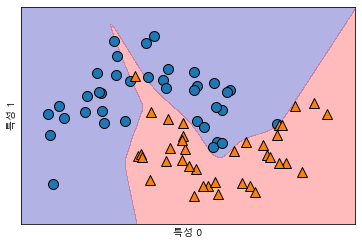

In [62]:
# 'tanh 활성화 함수'가 적용된 '10개의 유닛'으로 된 '두 개의 은닉층'
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

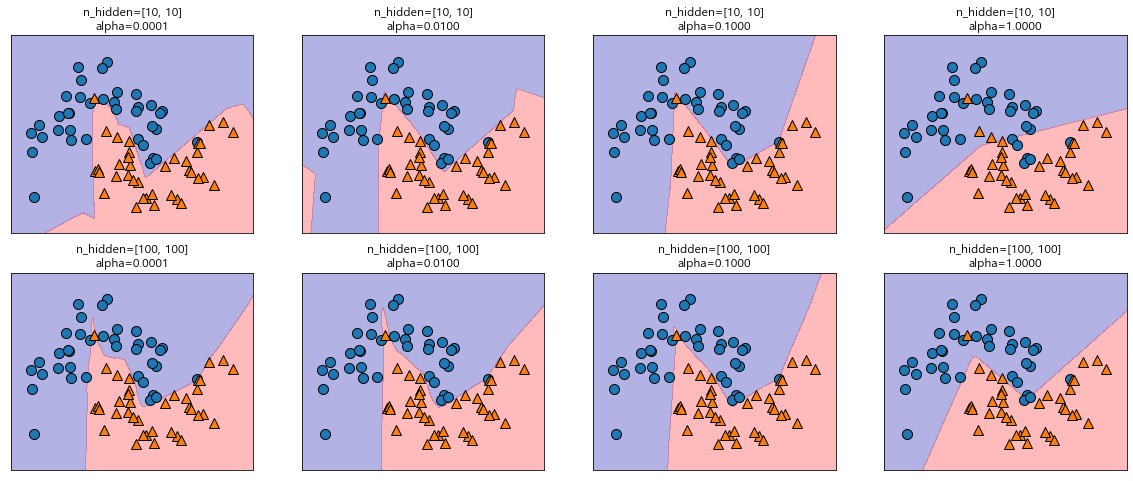

In [69]:
# 유닛이 각각 10개, 100개 & 은닉층 2개 => alpha값이 미치는 영향
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

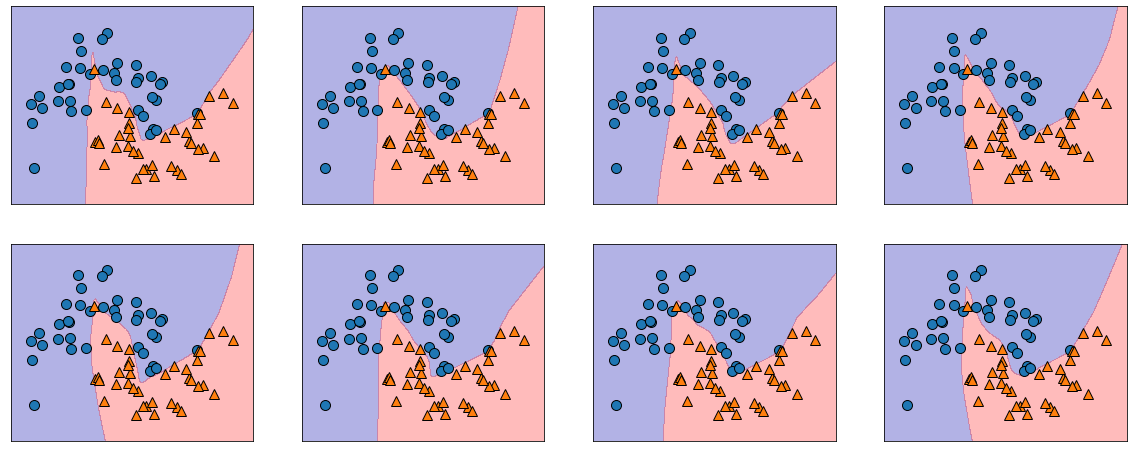

In [80]:
# 같은 매개변수 & 다른 초기값
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)    

In [86]:
# 유방암 데이터셋 & MLPClassifier 적용 & 매개변수는 기본값
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print('유방암 데이터의 특성별 최댓값:\n', cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [104]:
# 스케일 맞추기
# 훈련 세트 각 특성의 평균을 계산
mean_on_train = X_train.mean(axis=0)

# 훈련 세트 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)
    
# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1인 데이터 (표준정규분포를 따르는, z-점수)로 변환
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 테스트 세트도 같은 변환
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [112]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.812
테스트 세트 정확도: 0.790


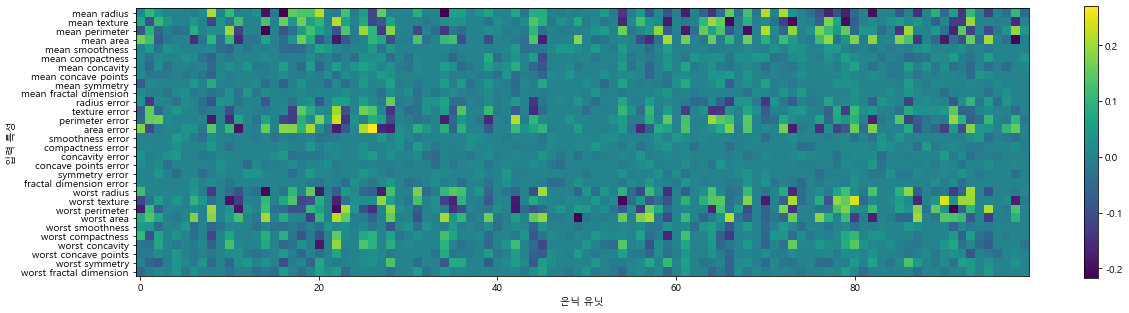

In [126]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()